# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como:

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
xy-\beta z\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parámetros y  realice un gráfico en 3D de la solución, empleando el código de más abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Cómo puede estar seguro de que la solución es la esperada?


In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [2]:
def fun_atractor(mci,t,sig,ro,beta):
    du1dt=sig*(mci[1]-mci[0])
    du2dt=mci[0]*(ro-mci[2])-mci[1]
    du3dt=mci[0]*mci[1]-beta*mci[2]
    U=[du1dt,du2dt,du3dt]
    return U

Parámetro 1

In [3]:
#Condiciones iniciales del problema
mci1=np.array([1.5,1.5,1.5])
t=np.linspace(0,30,10000)
#Constantes del problema
sig=10.0
beta=8/3
ro=28
sol1=odeint(fun_atractor,mci1,t,args=(sig,ro,beta))

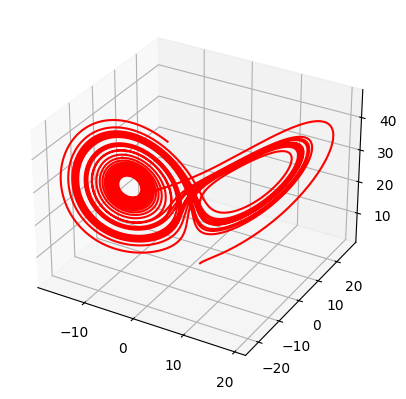

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(sol1[::,0],sol1[::,1],sol1[::,2],color='red')
plt.draw()
plt.show()

Párametro 2

In [5]:
#Condiciones iniciales del problema
mci2=np.array([1.5,1.5,1.5])
#t=np.linspace(0,30,10000)
#Constantes del problema
sig=10.0
beta=8/3
ro2=25
sol2=odeint(fun_atractor,mci2,t,args=(sig,ro2,beta))

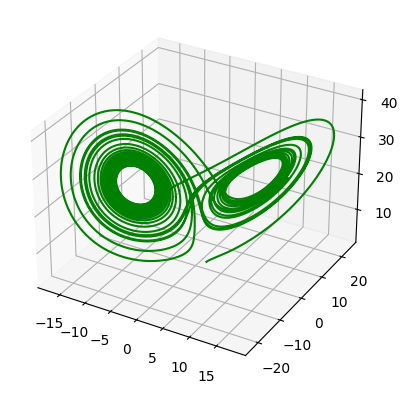

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(sol2[::,0],sol2[::,1],sol2[::,2],color='green')
plt.draw()
plt.show()

Párametro 3

In [7]:
#Condiciones iniciales del problema
mci3=np.array([1,1,1])
t=np.linspace(0,30,10000)
#Constantes del problema
sig=10.0
beta=8/3
ro3=25
sol3=odeint(fun_atractor,mci3,t,args=(sig,ro3,beta))

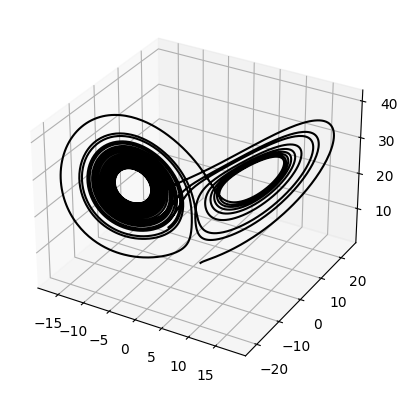

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(sol3[::,0],sol3[::,1],sol3[::,2],color='k')
plt.draw()
plt.show()

Parámetro 4

In [9]:
#Condiciones iniciales del problema
mci4=np.array([1.001,1.001,1.001])
t=np.linspace(0,30,10000)
#Constantes del problema
sig=10.0
beta=8/3
ro4=25
sol4=odeint(fun_atractor,mci4,t,args=(sig,ro4,beta))

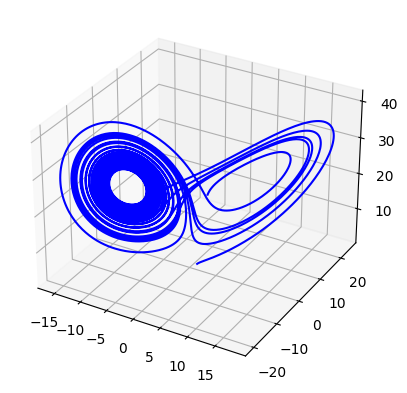

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(sol4[::,0],sol4[::,1],sol4[::,2],color='blue')
plt.draw()
plt.show()

## ¿Cómo puede estar seguro de que la solución es la esperada?

Mediante un análisis de sensibilidad, es decir se explora variaciones en los parámetros iniciales del sistema, observando como estas afectan la trayectoria en el espacio fase. La verificación de los resultados reveló una notable consistencia, al modificar las condiciones iniciales, el sistema no sigue un proceso idéntico, pero de manera consistente tiende a adoptar la forma de un atractor. Este fenomeno sugiere que el sistema exhibe propiedades atractivas incluso en me dio de las variaciones inciales. Es particularmente destacable que, durante este proceso, las líneas trazadas en el epacio fase no se cruzan, revelando un movimiento caótico inherente.
